# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [5]:
pip install imbalanced-learn


   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [7]:
# Cargar datos
titanic = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")

# Preparar datos
titanic.drop(columns="Cabin", inplace=True)
titanic.dropna(inplace=True)
titanic.drop(columns=["Name", "Ticket", "PassengerId"], inplace=True)
titanic["Sex"] = titanic["Sex"].replace({"male": 0, "female": 1})
titanic = pd.get_dummies(titanic, columns=["Embarked"])

C:\Users\MartínPazYáñez\AppData\Local\Temp\ipykernel_28060\720465470.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["Sex"] = titanic["Sex"].replace({"male": 0, "female": 1})


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Distribución de la variable target:
Survived
0    424
1    288
Name: count, dtype: int64


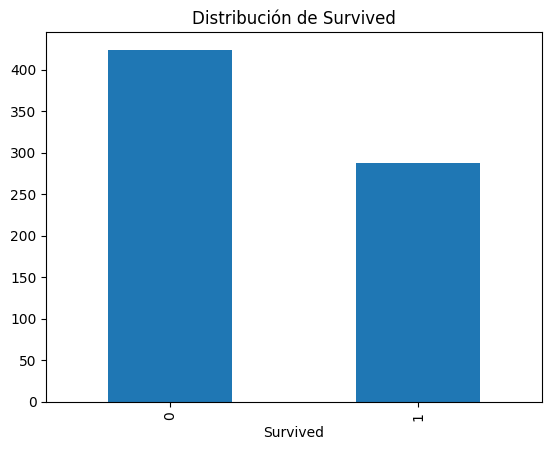

In [8]:
# ============================================
# EJERCICIO 1: Distribución de target
# ============================================

print("Distribución de la variable target:")
print(titanic["Survived"].value_counts())

# Visualizar
survived_plot = titanic["Survived"].value_counts()
survived_plot.plot(kind="bar")
plt.title("Distribución de Survived")
plt.show()

In [9]:
# ============================================
# EJERCICIO 2: Train LogisticRegression
# ============================================

features = titanic.drop(columns=["Survived"])
target = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
# ============================================
# EJERCICIO 3: Evaluar modelo
# ============================================

pred = log_reg.predict(X_test_scaled)
print("\nResultados con datos ORIGINALES:")
print(classification_report(y_test, pred))


Resultados con datos ORIGINALES:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.81      0.68      0.74        79

    accuracy                           0.79       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.79      0.79      0.78       178



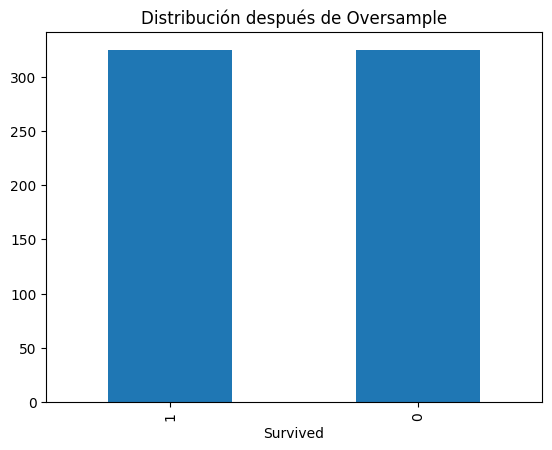


Resultados con OVERSAMPLE:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.75      0.75      0.75        79

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



c:\Users\MartínPazYáñez\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
# ============================================
# EJERCICIO 4: OVERSAMPLE
# ============================================

train = pd.DataFrame(X_train_scaled, columns=features.columns)
train["Survived"] = y_train.values

survived = train[train["Survived"] == 1]
no_survived = train[train["Survived"] == 0]

# Oversample
survived_oversampled = resample(survived, 
                                replace=True, 
                                n_samples=len(no_survived),
                                random_state=0)

train_over = pd.concat([survived_oversampled, no_survived])

# Visualizar
survived_plt = train_over["Survived"].value_counts()
survived_plt.plot(kind="bar")
plt.title("Distribución después de Oversample")
plt.show()

# Entrenar con oversample
X_train_over = train_over.drop(columns=["Survived"])
y_train_over = train_over["Survived"]

log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

# Evaluar
pred = log_reg.predict(X_test_scaled)
print("\nResultados con OVERSAMPLE:")
print(classification_report(y_test, pred))

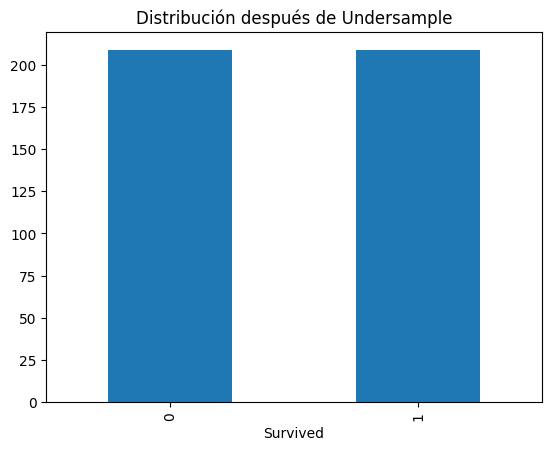


Resultados con UNDERSAMPLE:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.74      0.73      0.74        79

    accuracy                           0.77       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.77      0.77      0.77       178



c:\Users\MartínPazYáñez\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [12]:
# ============================================
# EJERCICIO 5: UNDERSAMPLE
# ============================================

# Undersample
no_survived_undersampled = resample(no_survived, 
                                    replace=False, 
                                    n_samples=len(survived),
                                    random_state=0)

train_under = pd.concat([no_survived_undersampled, survived])

# Visualizar
survived_plt = train_under["Survived"].value_counts()
survived_plt.plot(kind="bar")
plt.title("Distribución después de Undersample")
plt.show()

# Entrenar con undersample
X_train_under = train_under.drop(columns=["Survived"])
y_train_under = train_under["Survived"]

log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

# Evaluar
pred = log_reg.predict(X_test_scaled)
print("\nResultados con UNDERSAMPLE:")
print(classification_report(y_test, pred))

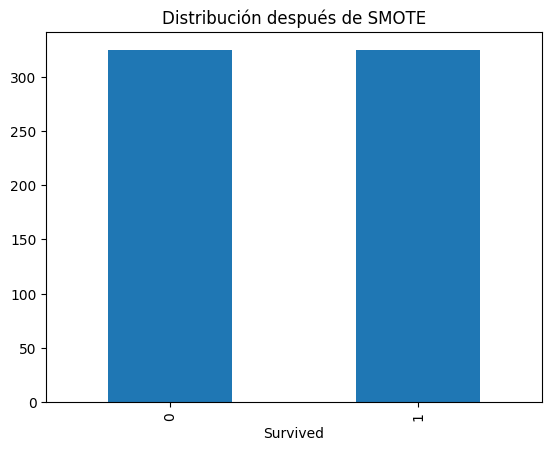


Resultados con SMOTE:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.75      0.73      0.74        79

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.77      0.78      0.77       178



In [13]:
# ============================================
# EJERCICIO 6: SMOTE
# ============================================

# SMOTE
sm = SMOTE(random_state=1, sampling_strategy=1.0)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

# Visualizar
survived_plt = pd.Series(y_train_sm).value_counts()
survived_plt.plot(kind="bar")
plt.title("Distribución después de SMOTE")
plt.show()

# Entrenar con SMOTE
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

# Evaluar
pred = log_reg.predict(X_test_scaled)
print("\nResultados con SMOTE:")
print(classification_report(y_test, pred))